In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para proyecciones 3D

# Parámetros
f = 1e9  # Frecuencia en Hz (1 GHz)
c = 3e8  # Velocidad de la luz en m/s
lambda_0 = c / f  # Longitud de onda en metros
k = 2 * np.pi / lambda_0  # Número de onda
d_var = lambda_0 / 2  # Separación entre elementos (λ/2)
N = 4  # Número de elementos
eficiencia = 0.9  # Eficiencia de la antena (90%)

# Longitud del dipolo
l_dipolo = lambda_0 / 2  # Longitud del dipolo (λ/2)

In [42]:
print(d_var)
print(l_dipolo)

0.15
0.15


In [43]:
# Función para el patrón de radiación de un dipolo de media onda
def ptron_elemento(theta):
    # Patrón de radiación de un dipolo de media onda
    #E0 = np.abs(np.sin(theta))  # Simplificado a sin(theta) para el patrón
    
    E0 = 1
    
    return E0

In [44]:
# Función para el patrón de radiación en el plano ZX
def patron_radiacion():
    # θ varía de 0 a π
    theta = np.linspace(0, np.pi, 180)
    
    # Patrón de radiación de elemento (dipolo)
    E0 = ptron_elemento(theta)

    # Factor de arreglo para un arreglo lineal sobre el eje X
    psi = k * d_var * np.sin(theta)
    AF = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))

    # Campo total
    E_total = E0 * AF
    
    # Normalizar a dB
    E_total_dB = 20 * np.log10(E_total / np.max(E_total))

    return theta, E_total_dB

# Función para el patrón de radiación en el plano XY
def patron_radiacion_xy():
    # φ varía de 0 a 2π (plano XY)
    phi = np.linspace(0, 2 * np.pi, 360)

    # θ es π/2 para el plano XY
    theta = np.pi / 2

    # Patrón de radiación de elemento (dipolo)
    E0 = ptron_elemento(np.array([theta]))  # constante en θ = π/2

    # Factor de arreglo para un arreglo lineal sobre el eje X
    psi = k * d_var * np.cos(phi)
    AF = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))

    # Campo total
    E_total = E0 * AF

    # Normalizar a dB
    E_total_dB = 20 * np.log10(E_total / np.max(E_total))

    return phi, E_total_dB

# Función para el patrón de radiación en el plano ZY
def patron_radiacion_zy():
    # θ varía de 0 a π (plano ZY)
    theta = np.linspace(0, np.pi, 180)

    # En el plano ZY, el patrón del dipolo debería ser omnidireccional
    E0 = ptron_elemento(theta)

    # En el plano ZY, el factor de arreglo no influye (ya que es perpendicular al arreglo)
    E_total = E0
    
    # Normalizar a dB
    E_total_dB = 20 * np.log10(E_total / np.max(E_total))

    return theta, E_total_dB

In [45]:
# Función para graficar el patrón de radiación en coordenadas polares
def plot_patron_radiacion(theta_or_phi, E_dB, plane_name):
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta_or_phi, E_dB)
    ax.set_title(f'Patrón de Radiación {plane_name}')
    ax.set_theta_zero_location('N')  # 0° en la parte superior
    ax.set_theta_direction(-1)       # Sentido horario
    ax.set_rlim(-40, 0)              # Limitar el rango de dB
    plt.show()

C:\Users\Facultad\AppData\Local\Temp\ipykernel_5500\2142359586.py:11: RuntimeWarning: invalid value encountered in divide
  AF = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))


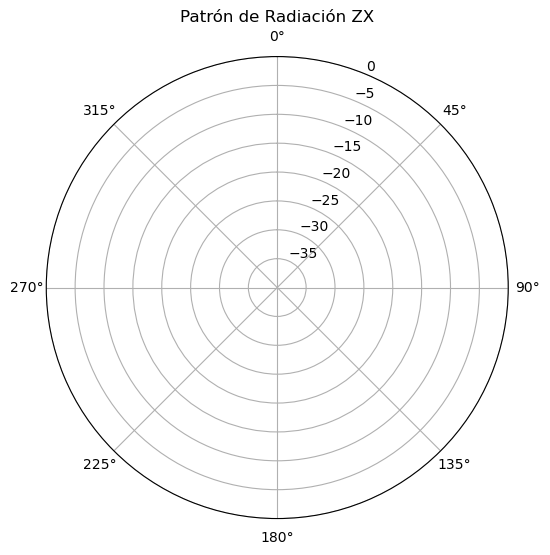

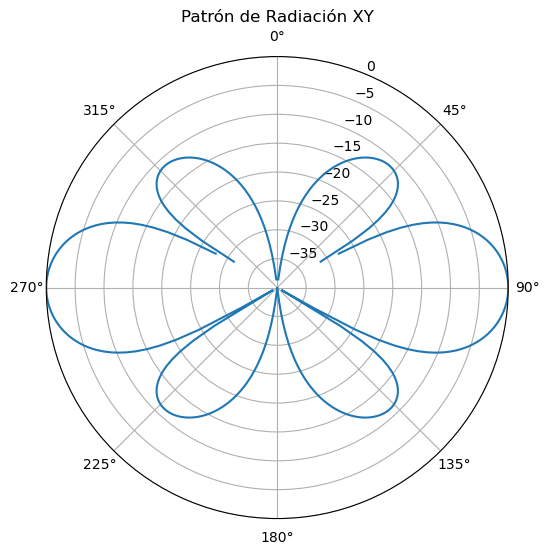

ValueError: x and y must have same first dimension, but have shapes (180,) and (1,)

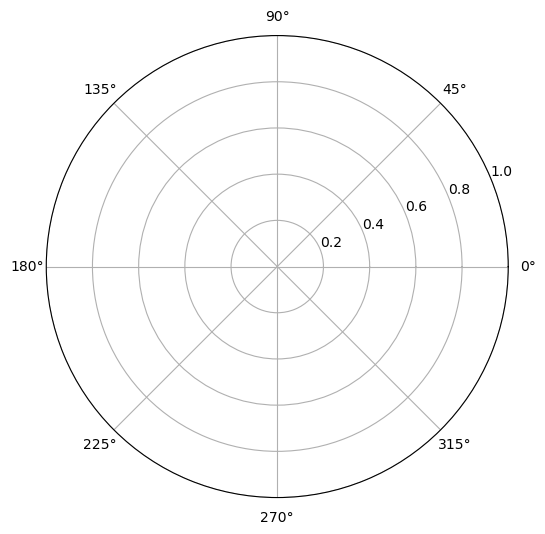

In [46]:
# Graficar el patrón en el plano ZX
theta, E_dB_zx = patron_radiacion()
plot_patron_radiacion(theta, E_dB_zx, 'ZX')

# Graficar el patrón en el plano XY
phi, E_dB_xy = patron_radiacion_xy()
plot_patron_radiacion(phi, E_dB_xy, 'XY')

# Graficar el patrón en el plano ZY
theta, E_dB_zy = patron_radiacion_zy()
plot_patron_radiacion(theta, E_dB_zy, 'ZY')

In [ ]:
# Función del patrón de radiación de un dipolo
def patron_dipolo(theta, orientacion='x'):
    if orientacion == 'x':
        return np.abs(np.sin(theta))  # Dipolo alineado en el eje x
    elif orientacion == 'y':
        return np.abs(np.cos(theta))  # Dipolo alineado en el eje y
    elif orientacion == 'z':
        return np.abs(np.sin(theta))  # Similar a x, pero con variación en el plano perpendicular
    else:
        raise ValueError("Orientación no válida. Usa 'x', 'y' o 'z'.")

In [ ]:
# Factor de arreglo calculado para un ángulo y desplazamiento dados
def factor_arreglo(theta, phi, orientacion='xy'):
    if orientacion == 'xy':
        psi = k * d_var * np.cos(phi)  # Plano XY
    elif orientacion == 'zx' or orientacion == 'zy':
        psi = k * d_var * np.sin(theta)  # Planos ZX y ZY
    af = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))
    return af

In [ ]:
# Graficar patrones de radiación
def plot_patron_radiacion(theta_or_phi, pattern, title):
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta_or_phi, pattern)
    ax.set_title(title)
    ax.set_rlim(-20, 13)  # Escala en dB
    plt.show()

In [ ]:
# Función para seleccionar la orientación del dipolo
def plot_radiacion_dipolo(orientation='x'):
    # Plano XY (en el plano horizontal)
    phi = np.linspace(0, 2 * np.pi, 360)
    theta_xy = np.pi / 2  # Ángulo fijo para plano XY
    af_xy = factor_arreglo(theta_xy, phi, 'xy')
    pattern_xy = 20 * np.log10(patron_dipolo(np.array([theta_xy]), orientation) * af_xy)

    # Plano ZX y ZY: Extendemos theta de 0 a 2*pi para representar 360 grados
    theta = np.linspace(0, 2 * np.pi, 360)
    af_zx = factor_arreglo(theta, 0, 'zx')
    pattern_zx = 20 * np.log10(patron_dipolo(theta, orientation) * af_zx)

    af_zy = factor_arreglo(theta, 0, 'zy')
    pattern_zy = 20 * np.log10(patron_dipolo(theta, orientation) * af_zy)

    # Mostrar gráficas
    plot_patron_radiacion(phi, pattern_xy, f"Patrón de Radiación XY ({orientation})")
    plot_patron_radiacion(theta, pattern_zx, f"Patrón de Radiación ZX ({orientation})")
    plot_patron_radiacion(theta, pattern_zy, f"Patrón de Radiación ZY ({orientation})")

C:\Users\Facultad\AppData\Local\Temp\ipykernel_5500\1769254631.py:7: RuntimeWarning: invalid value encountered in divide
  af = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))


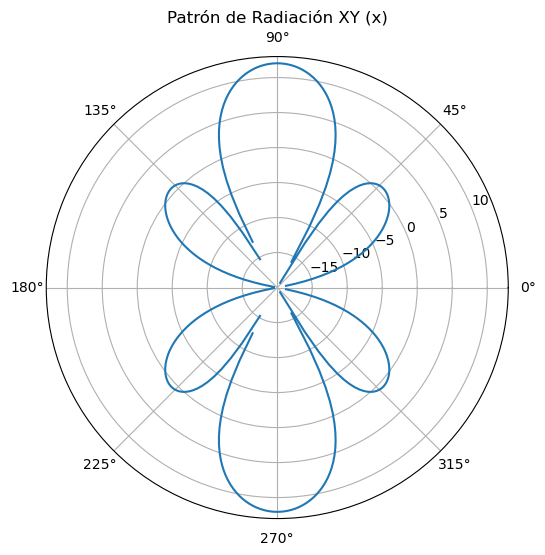

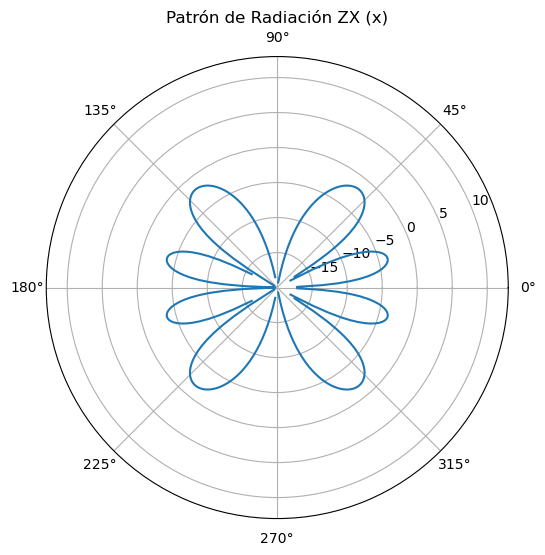

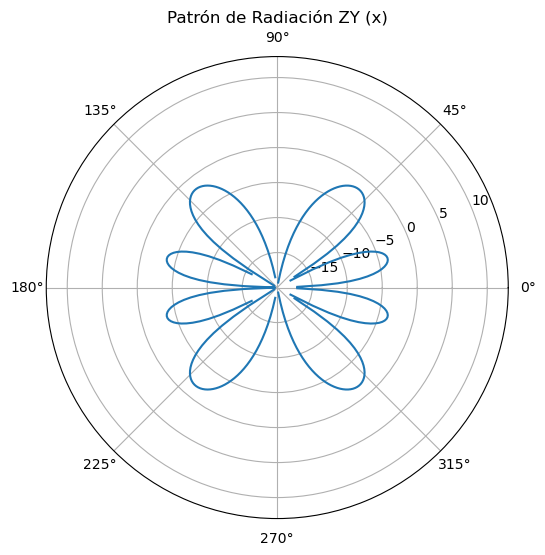

In [ ]:
# Seleccionar la orientación del dipolo (x, y o z)
orientacion = 'x'  # Cambia esto a 'y' o 'z' para cambiar la polarización
plot_radiacion_dipolo(orientacion)


In [ ]:
# Ángulos de barrido (theta y phi)
theta = np.linspace(0, np.pi, 360)
phi = np.linspace(0, 2 * np.pi, 360)

In [ ]:
# Seleccionar la polarización: 'x', 'y', 'z'
polarizacion = 'x'

In [ ]:
# Función para calcular los componentes E-theta y E-phi
def calcular_parton_radiacion(theta, phi, polarizacion):
    if polarizacion == 'x':
        E_theta = np.sin(theta) * np.cos(phi)  # Componente E-theta
        E_phi = np.cos(theta) * np.sin(phi)    # Componente E-phi
    elif polarizacion == 'y':
        E_theta = np.sin(theta) * np.sin(phi)
        E_phi = np.cos(theta) * np.cos(phi)
    else:  # Polarización en 'z'
        E_theta = np.cos(theta)
        E_phi = np.zeros_like(phi)  # No hay componente E-phi en polarización z

    return E_theta, E_phi

In [ ]:
# Graficar los patrones de radiación E-theta y E-phi en gráficos polares
def plot_etheta_ephi(E_theta, E_phi, theta, phi):
    # Graficar E-theta en un gráfico polar
    plt.figure()
    plt.polar(theta, 20 * np.log10(np.abs(E_theta)), label='E-theta')
    plt.title('Patrón de Radiación E-theta')
    plt.legend()
    plt.show()

    # Graficar E-phi en un gráfico polar
    plt.figure()
    plt.polar(phi, 20 * np.log10(np.abs(E_phi)), label='E-phi')
    plt.title('Patrón de Radiación E-phi')
    plt.legend()
    plt.show()

C:\Users\Facultad\AppData\Local\Temp\ipykernel_5500\3982736807.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.polar(theta, 20 * np.log10(np.abs(E_theta)), label='E-theta')


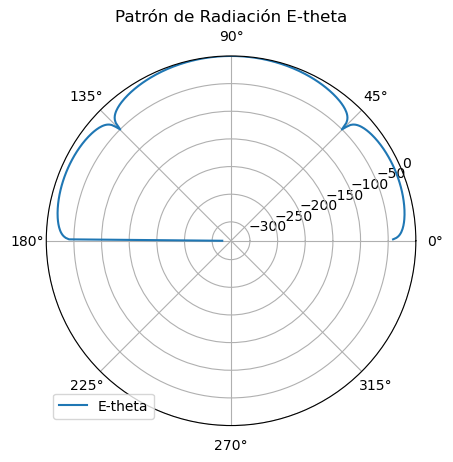

C:\Users\Facultad\AppData\Local\Temp\ipykernel_5500\3982736807.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.polar(phi, 20 * np.log10(np.abs(E_phi)), label='E-phi')


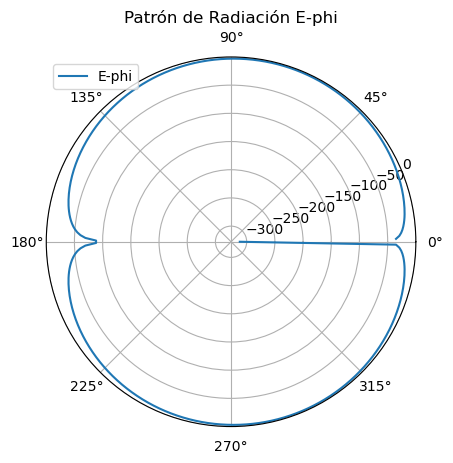

In [ ]:
# Calcular los patrones de radiación para los dipolos en polarización seleccionada
E_theta, E_phi = calcular_parton_radiacion(theta, phi, polarizacion)

# Graficar los patrones de radiación para E-theta y E-phi
plot_etheta_ephi(E_theta, E_phi, theta, phi)

In [ ]:
# Parámetros de la antena
f = 1e9  # Frecuencia (1 GHz)
c = 3e8  # Velocidad de la luz (m/s)
lambda_0 = c / f  # Longitud de onda
k = 2 * np.pi / lambda_0  # Número de onda

# Ángulos theta y phi
theta = np.linspace(0, np.pi, 360)
phi = np.linspace(0, 2 * np.pi, 360)
theta, phi = np.meshgrid(theta, phi)

In [ ]:
# Función para calcular los componentes E-theta y E-phi para un dipolo corto
def calcular_patron_radiacion_3d(theta, phi, polarizacion):
    if polarizacion == 'x':
        E_theta = np.sin(theta) * np.cos(phi)
        E_phi = np.zeros_like(phi)
    elif polarizacion == 'y':
        E_theta = np.sin(theta) * np.sin(phi)
        E_phi = np.zeros_like(phi)
    else:  # Polarización en 'z'
        E_theta = np.sin(theta)
        E_phi = np.zeros_like(phi)

    # El patrón de radiación total es la magnitud combinada de E-theta y E-phi
    E_total = np.sqrt(E_theta**2 + E_phi**2)
    
    return E_total

In [ ]:
# Función para graficar el patrón de radiación en 3D
def plot_patron_radiacion_3d(E_total, theta, phi):
    # Convertir coordenadas esféricas a cartesianas para graficar en 3D
    r = np.abs(E_total)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    # Crear el gráfico 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar la superficie
    surf = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(r / np.max(r)), rstride=1, cstride=1, alpha=0.9, edgecolor='none')
    
    # Configuraciones estéticas
    ax.set_title("Patrón de Radiación 3D")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Añadir barra de colores, ahora vinculada a la superficie 'surf'
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Magnitud Normalizada')
    
    plt.show()

In [ ]:
# Seleccionar la polarización ('x', 'y', 'z')
polarizacion = 'x'  

# Calcular el patrón de radiación total para el gráfico 3D
E_total = calcular_patron_radiacion_3d(theta, phi, polarizacion)

# Graficar el patrón de radiación en 3D
plot_patron_radiacion_3d(E_total, theta, phi)

KeyboardInterrupt: 

In [ ]:
# Función para calcular la potencia radiada total
def calculate_potencia_radiada_total(E_total, theta, phi):
    dtheta = np.pi / 360
    dphi = 2 * np.pi / 360
    
    # Calcular el valor integrando la densidad de potencia
    P_total = np.sum(E_total**2 * np.sin(theta) * dtheta * dphi)
    
    return P_total

In [ ]:
# Función para calcular la directividad en dB
def calcular_directividad(E_total, theta, phi):
    U_max = np.max(E_total**2)
    P_total = calculate_potencia_radiada_total(E_total, theta, phi)
    
    # Directividad
    D = 4 * np.pi * U_max / P_total
    
    # Convertir a dB
    D_dB = 10 * np.log10(D)
    
    return D_dB

In [ ]:
# Función para calcular la ganancia en dB
def calcular_ganancia(E_total, theta, phi, efficiency):
    D_dB = calcular_directividad(E_total, theta, phi)
    G_dB = 10 * np.log10(efficiency) + D_dB  # Ganancia en dB
    return G_dB

In [ ]:
# Calcular directividad y ganancia
D_dB = calcular_directividad(E_total, theta, phi)
G_dB = calcular_ganancia(E_total, theta, phi, eficiencia)

# Imprimir los resultados
print(f"Directividad (D): {D_dB:.2f} dB")
print(f"Ganancia (G): {G_dB:.2f} dB")

Directividad (D): 4.77 dB
Ganancia (G): 4.31 dB


In [ ]:
# Función para calcular la directividad
def calcular_directividad(E_total, theta, phi):
    # E_total es el patrón de radiación total
    # theta y phi son los ángulos en coordenadas esféricas

    # Paso 1: Calcular la potencia radiada total
    dtheta = theta[1] - theta[0]
    dphi = phi[1] - phi[0]
    sin_theta = np.sin(theta)

    # Integramos sobre la esfera para obtener la potencia total radiada
    Prad_total = np.sum(E_total**2 * sin_theta[:, np.newaxis] * dtheta * dphi)

    # Paso 2: Calcular la densidad de potencia máxima
    U_max = np.max(E_total**2)

    # Paso 3: Calcular la directividad
    directividad = 4 * np.pi * U_max / Prad_total

    # Convertir a dB
    directividad_dB = 10 * np.log10(directividad)

    return directividad, directividad_dB



In [ ]:
# Función para calcular la ganancia
def calcular_ganancia(directividad, eficiencia):
    # Ganancia es la directividad multiplicada por la eficiencia de la antena
    ganancia = directividad * eficiencia

    # Convertir a dB
    ganancia_dB = 10 * np.log10(ganancia)

    return ganancia, ganancia_dB

In [ ]:
# Ejemplo de uso con E_total, theta y phi generados por el patrón de radiación 3D
theta = np.linspace(0, np.pi, 180)  # 180 puntos para theta
phi = np.linspace(0, 2*np.pi, 360)  # 360 puntos para phi

# Supongamos que E_total es el patrón de radiación ya calculado (normalizado)
# Puedes reemplazar esta parte con los valores calculados en tu código
E_total = np.abs(np.sin(theta[:, np.newaxis]) * np.cos(phi[np.newaxis, :]))

# Cálculo de la directividad
D, D_dB = calcular_directividad(E_total, theta, phi)

# Cálculo de la ganancia
G, G_dB = calcular_ganancia(D, eficiencia)

# Mostrar los resultados
print(f"Directividad (D): {D:.2f} (lineal), {D_dB:.2f} dB")
print(f"Ganancia (G): {G:.2f} (lineal), {G_dB:.2f} dB")


Directividad (D): 2.98 (lineal), 4.75 dB
Ganancia (G): 2.68 (lineal), 4.29 dB


C:\Users\Facultad\AppData\Local\Temp\ipykernel_5500\2326316590.py:29: RuntimeWarning: invalid value encountered in divide
  af = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))  # Factor de arreglo


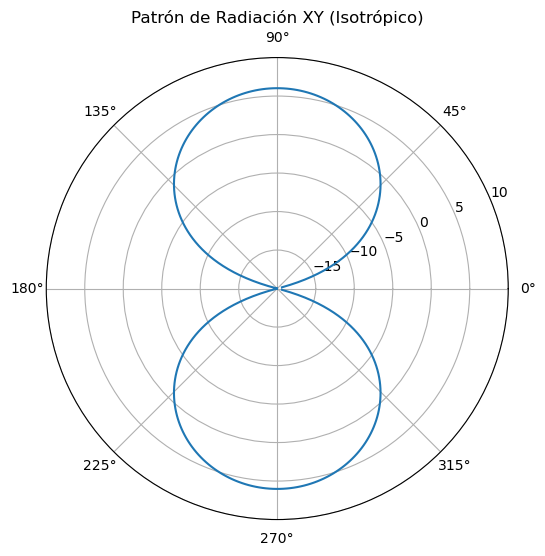

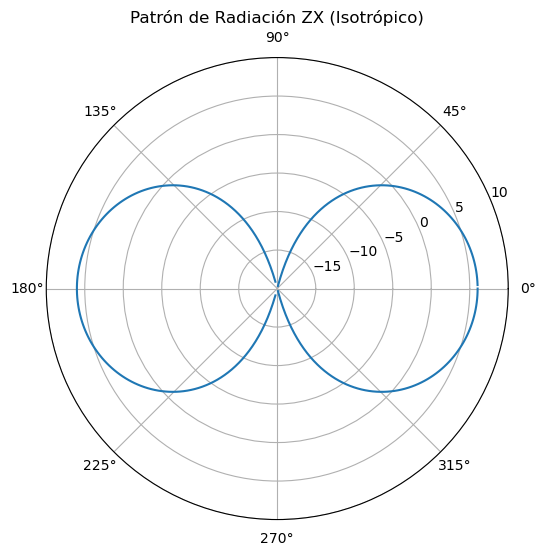

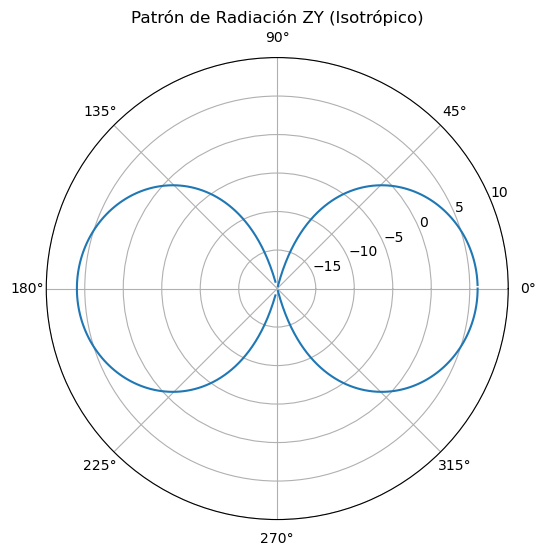

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
f = 1e9  # Frecuencia en Hz (1 GHz)
c = 3e8  # Velocidad de la luz en m/s
lambda_0 = c / f  # Longitud de onda en metros
k = 2 * np.pi / lambda_0  # Número de onda
d_var = lambda_0 / 2  # Separación entre elementos (λ/2)
N = 2  # Número de elementos (dipolos o fuentes isotrópicas)
eficiencia = 0.9  # Eficiencia de la antena (90%)

# Función para el patrón de radiación de un dipolo de media onda
def patron_dipolo(theta):
    E0 = np.abs(np.sin(theta))  # sin(theta) para el patrón de dipolos
    return E0

# Función para el patrón de radiación de una fuente isotrópica
def patron_isotropico(theta):
    E0 = np.ones_like(theta)  # Patrón constante para fuentes isotrópicas
    return E0

# Factor de arreglo para un arreglo lineal en el eje X
def factor_arreglo(theta, phi, orientacion='xy'):
    if orientacion == 'xy':
        psi = k * d_var * np.cos(phi)  # Plano XY
    elif orientacion == 'zx' or orientacion == 'zy':
        psi = k * d_var * np.sin(theta)  # Planos ZX y ZY
    af = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))  # Factor de arreglo
    return af

# Función para graficar patrones de radiación
def plot_patron_radiacion(theta_or_phi, pattern, title):
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta_or_phi, pattern)
    ax.set_title(title)
    ax.set_rlim(-20, 10)  # Escala en dB
    plt.show()

# Función para graficar arreglo de dipolos cortos
def plot_radiacion_dipolo():
    # Plano XY (en el plano horizontal)
    phi = np.linspace(0, 2 * np.pi, 360)
    theta_xy = np.pi / 2  # Ángulo fijo para plano XY
    af_xy = factor_arreglo(theta_xy, phi, 'xy')
    pattern_xy = 20 * np.log10(patron_dipolo(np.array([theta_xy])) * af_xy)

    # Plano ZX y ZY: Extendemos theta de 0 a 2*pi para representar 360 grados
    theta = np.linspace(0, 2 * np.pi, 360)
    af_zx = factor_arreglo(theta, 0, 'zx')
    pattern_zx = 20 * np.log10(patron_dipolo(theta) * af_zx)

    af_zy = factor_arreglo(theta, 0, 'zy')
    pattern_zy = 20 * np.log10(patron_dipolo(theta) * af_zy)

    # Mostrar gráficas
    plot_patron_radiacion(phi, pattern_xy, "Patrón de Radiación XY (Dipolos Cortos)")
    plot_patron_radiacion(theta, pattern_zx, "Patrón de Radiación ZX (Dipolos Cortos)")
    plot_patron_radiacion(theta, pattern_zy, "Patrón de Radiación ZY (Dipolos Cortos)")

# Función para graficar arreglo de fuentes isotrópicas
def plot_radiacion_isotropico():
    # Plano XY (en el plano horizontal)
    phi = np.linspace(0, 2 * np.pi, 360)
    theta_xy = np.pi / 2  # Ángulo fijo para plano XY
    af_xy = factor_arreglo(theta_xy, phi, 'xy')
    pattern_xy = 20 * np.log10(patron_isotropico(np.array([theta_xy])) * af_xy)

    # Plano ZX y ZY: Extendemos theta de 0 a 2*pi para representar 360 grados
    theta = np.linspace(0, 2 * np.pi, 360)
    af_zx = factor_arreglo(theta, 0, 'zx')
    pattern_zx = 20 * np.log10(patron_isotropico(theta) * af_zx)

    af_zy = factor_arreglo(theta, 0, 'zy')
    pattern_zy = 20 * np.log10(patron_isotropico(theta) * af_zy)

    # Mostrar gráficas
    plot_patron_radiacion(phi, pattern_xy, "Patrón de Radiación XY (Isotrópico)")
    plot_patron_radiacion(theta, pattern_zx, "Patrón de Radiación ZX (Isotrópico)")
    plot_patron_radiacion(theta, pattern_zy, "Patrón de Radiación ZY (Isotrópico)")

# Función para seleccionar el tipo de arreglo a graficar
def seleccionar_tipo_arreglo(tipo_arreglo):
    if tipo_arreglo == 'dipolos':
        plot_radiacion_dipolo()
    elif tipo_arreglo == 'isotropico':
        plot_radiacion_isotropico()
    else:
        print("Tipo de arreglo no válido. Usa 'dipolos' o 'isotropico'.")

# Ejemplo de uso:
# Puedes seleccionar el tipo de arreglo llamando a esta función
tipo_arreglo = 'isotropico'  # Cambia a 'dipolos' para el arreglo de dipolos cortos
seleccionar_tipo_arreglo(tipo_arreglo)


C:\Users\Facultad\AppData\Local\Temp\ipykernel_5500\933914398.py:35: RuntimeWarning: invalid value encountered in divide
  af = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))  # Factor de arreglo


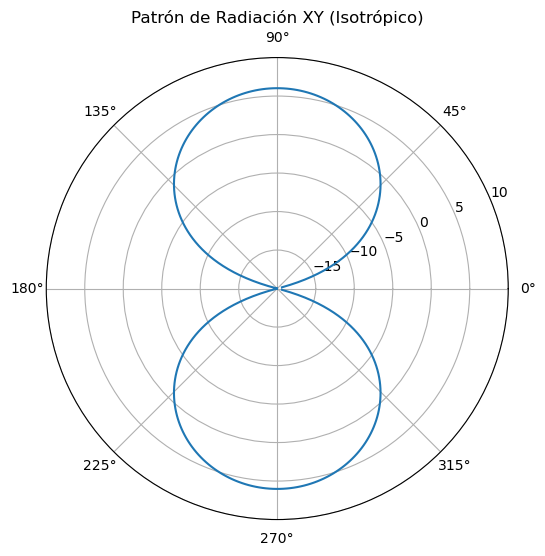

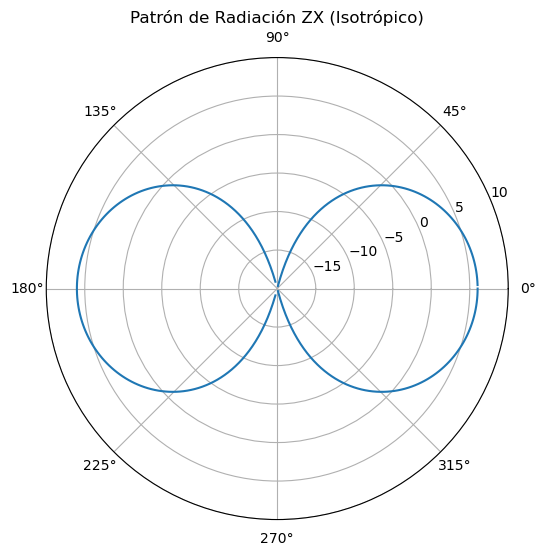

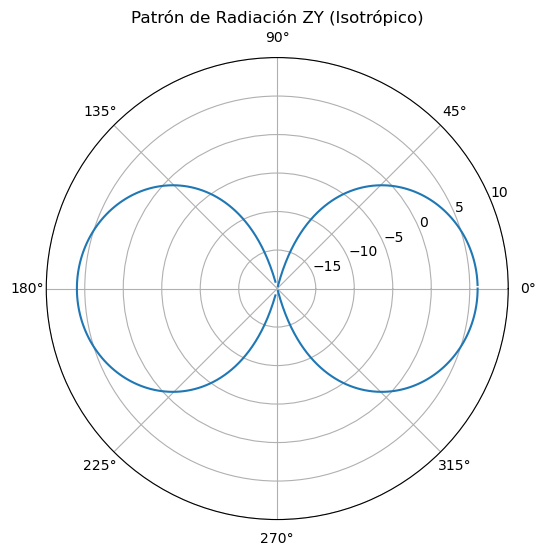

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
f = 1e9  # Frecuencia en Hz (1 GHz)
c = 3e8  # Velocidad de la luz en m/s
lambda_0 = c / f  # Longitud de onda en metros
k = 2 * np.pi / lambda_0  # Número de onda
d_var = lambda_0 / 2  # Separación entre elementos (λ/2)
N = 2  # Número de elementos (dipolos o fuentes isotrópicas)
eficiencia = 0.9  # Eficiencia de la antena (90%)

# Función para el patrón de radiación de un dipolo de media onda según la orientación
def patron_dipolo(theta, orientacion='x'):
    if orientacion == 'x':
        return np.abs(np.sin(theta))  # Dipolo alineado en el eje x
    elif orientacion == 'y':
        return np.abs(np.cos(theta))  # Dipolo alineado en el eje y
    elif orientacion == 'z':
        return np.abs(np.sin(theta))  # Similar a x, pero con variación en el plano perpendicular
    else:
        raise ValueError("Orientación no válida. Usa 'x', 'y' o 'z'.")

# Función para el patrón de radiación de una fuente isotrópica
def patron_isotropico(theta):
    E0 = np.ones_like(theta)  # Patrón constante para fuentes isotrópicas // Return an array of ones with the same shape and type as a given array.
    return E0

# Factor de arreglo para un arreglo lineal en el eje X
def factor_arreglo(theta, phi, orientacion='xy'):
    if orientacion == 'xy':
        psi = k * d_var * np.cos(phi)  # Plano XY
    elif orientacion == 'zx' or orientacion == 'zy':
        psi = k * d_var * np.sin(theta)  # Planos ZX y ZY
    af = np.abs(np.sin(N * psi / 2) / np.sin(psi / 2))  # Factor de arreglo
    return af

# Función para graficar patrones de radiación
def plot_patron_radiacion(theta_or_phi, pattern, title):
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta_or_phi, pattern)
    ax.set_title(title)
    ax.set_rlim(-20, 10)  # Escala en dB
    plt.show()

# Función para graficar arreglo de dipolos cortos con opción de polarización
def plot_radiacion_dipolo(orientacion='x'):
    # Plano XY (en el plano horizontal)
    phi = np.linspace(0, 2 * np.pi, 360)
    theta_xy = np.pi / 2  # Ángulo fijo para plano XY
    af_xy = factor_arreglo(theta_xy, phi, 'xy')
    pattern_xy = 20 * np.log10(patron_dipolo(np.array([theta_xy]), orientacion) * af_xy)

    # Plano ZX y ZY: Extendemos theta de 0 a 2*pi para representar 360 grados
    theta = np.linspace(0, 2 * np.pi, 360)
    af_zx = factor_arreglo(theta, 0, 'zx')
    pattern_zx = 20 * np.log10(patron_dipolo(theta, orientacion) * af_zx)

    af_zy = factor_arreglo(theta, 0, 'zy')
    pattern_zy = 20 * np.log10(patron_dipolo(theta, orientacion) * af_zy)

    # Mostrar gráficas
    plot_patron_radiacion(phi, pattern_xy, f"Patrón de Radiación XY ({orientacion})")
    plot_patron_radiacion(theta, pattern_zx, f"Patrón de Radiación ZX ({orientacion})")
    plot_patron_radiacion(theta, pattern_zy, f"Patrón de Radiación ZY ({orientacion})")

# Función para graficar arreglo de fuentes isotrópicas
def plot_radiacion_isotropico():
    # Plano XY (en el plano horizontal)
    phi = np.linspace(0, 2 * np.pi, 360)
    theta_xy = np.pi / 2  # Ángulo fijo para plano XY
    af_xy = factor_arreglo(theta_xy, phi, 'xy')
    pattern_xy = 20 * np.log10(patron_isotropico(np.array([theta_xy])) * af_xy)

    # Plano ZX y ZY: Extendemos theta de 0 a 2*pi para representar 360 grados
    theta = np.linspace(0, 2 * np.pi, 360)
    af_zx = factor_arreglo(theta, 0, 'zx')
    pattern_zx = 20 * np.log10(patron_isotropico(theta) * af_zx)

    af_zy = factor_arreglo(theta, 0, 'zy')
    pattern_zy = 20 * np.log10(patron_isotropico(theta) * af_zy)

    # Mostrar gráficas
    plot_patron_radiacion(phi, pattern_xy, "Patrón de Radiación XY (Isotrópico)")
    plot_patron_radiacion(theta, pattern_zx, "Patrón de Radiación ZX (Isotrópico)")
    plot_patron_radiacion(theta, pattern_zy, "Patrón de Radiación ZY (Isotrópico)")

# Función para seleccionar el tipo de arreglo a graficar
def seleccionar_tipo_arreglo(tipo_arreglo, orientacion='x'):
    if tipo_arreglo == 'dipolos':
        plot_radiacion_dipolo(orientacion)
    elif tipo_arreglo == 'isotropico':
        plot_radiacion_isotropico()
    else:
        print("Tipo de arreglo no válido. Usa 'dipolos' o 'isotropico'.")


# seleccionar el tipo de arreglo y la orientación llamando a esta función
tipo_arreglo = 'isotropico'  # Cambia a 'isotropico' para el arreglo de fuentes isotrópicas
orientacion_polarizacion = 'x'  # Cambia a 'y' o 'z' para diferentes polarizaciones de dipolos
seleccionar_tipo_arreglo(tipo_arreglo, orientacion_polarizacion)
